In [5]:
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [6]:
file = "/Users/luojinmu/Desktop/MCD64A1.A2023152.h13v03.061.2023220221358.hdf"
H = int(file[-27:-25])
V = int(file[-24:-22])
print('tile:', H, V)

# Read files
f = SD(file, SDC.READ)

# Print all variables
print(f.datasets())

tile: 13 3
{'Burn Date': (('YDim:MOD_Grid_Monthly_500m_DB_BA', 'XDim:MOD_Grid_Monthly_500m_DB_BA'), (2400, 2400), 22, 0), 'Burn Date Uncertainty': (('YDim:MOD_Grid_Monthly_500m_DB_BA', 'XDim:MOD_Grid_Monthly_500m_DB_BA'), (2400, 2400), 21, 1), 'QA': (('YDim:MOD_Grid_Monthly_500m_DB_BA', 'XDim:MOD_Grid_Monthly_500m_DB_BA'), (2400, 2400), 21, 2), 'First Day': (('YDim:MOD_Grid_Monthly_500m_DB_BA', 'XDim:MOD_Grid_Monthly_500m_DB_BA'), (2400, 2400), 22, 3), 'Last Day': (('YDim:MOD_Grid_Monthly_500m_DB_BA', 'XDim:MOD_Grid_Monthly_500m_DB_BA'), (2400, 2400), 22, 4)}


(2400, 2400)


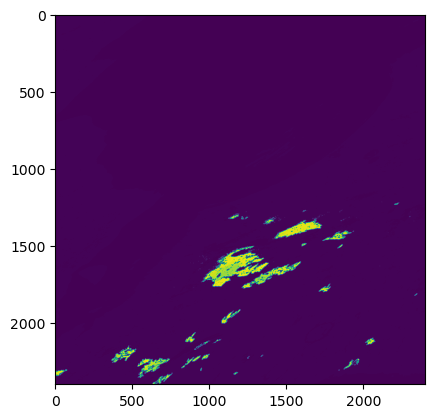

In [7]:
# Read dataset in to a numpy.ndarray
DATAFIELD_NAME='Burn Date'
BurnDate = f.select(DATAFIELD_NAME).get()
plt.imshow(BurnDate)
print(BurnDate.shape)

# Calculate the latitude and longitude (degree)
from MODISL3Coordination import modis_500m_coor
dim = np.arange(0, BurnDate.shape[0], 1)
lat, lon = modis_500m_coor(dim, dim, H, V)

[[59.99795504 59.99378837 59.9896217  ... 50.01045147 50.0062848
  50.00211813]
 [59.99795504 59.99378837 59.9896217  ... 50.01045147 50.0062848
  50.00211813]
 [59.99795504 59.99378837 59.9896217  ... 50.01045147 50.0062848
  50.00211813]
 ...
 [59.99795504 59.99378837 59.9896217  ... 50.01045147 50.0062848
  50.00211813]
 [59.99795504 59.99378837 59.9896217  ... 50.01045147 50.0062848
  50.00211813]
 [59.99795504 59.99378837 59.9896217  ... 50.01045147 50.0062848
  50.00211813]]
[[-99.98973816 -99.98973816 -99.98973816 ... -99.98973816 -99.98973816
  -99.98973816]
 [-99.96881476 -99.96881476 -99.96881476 ... -99.96881476 -99.96881476
  -99.96881476]
 [-99.94789715 -99.94789715 -99.94789715 ... -99.94789715 -99.94789715
  -99.94789715]
 ...
 [-62.25878271 -62.25878271 -62.25878271 ... -62.25878271 -62.25878271
  -62.25878271]
 [-62.24690255 -62.24690255 -62.24690255 ... -62.24690255 -62.24690255
  -62.24690255]
 [-62.23502478 -62.23502478 -62.23502478 ... -62.23502478 -62.23502478
  -